In [1]:
import scipy.stats as scs
import numpy as np
import pandas as pd

# Sandwiches

In [2]:
np.random.seed(831)
meat = np.random.choice(['turkey','ham','roast beef'], p=[0.6,0.1,0.3], size=12)
bread = np.random.choice(['white','wheat','dutch crunch'], p=[0.4,0.4,0.2], size=12)
cheese = np.random.choice(['Nope', 'Provolone', 'Cheddar'], p=[0.2, 0.3, 0.5], size=12)
mustard = np.random.choice([True, False], p=[0.75, 0.25], size=12)
price = np.random.randint(5,10, size=12).round(2)

sandwiches = pd.DataFrame(data={'meat':meat, 
                                'bread':bread, 
                                'cheese':cheese, 
                                'mustard?':mustard,
                                'price':price})

sandwiches.loc[sandwiches['cheese'] == 'Nope', 'price'] -= 1
sandwiches.loc[sandwiches['meat'] == 'roast beef', 'price'] += 1

sandwiches

,bread,cheese,meat,mustard?,price
0,white,Cheddar,roast beef,True,10
1,white,Nope,turkey,True,5
2,white,Provolone,turkey,True,6
3,wheat,Provolone,turkey,True,6
4,white,Cheddar,turkey,True,8
5,white,Cheddar,turkey,False,9
6,wheat,Cheddar,turkey,True,7
7,wheat,Provolone,turkey,True,6
8,dutch crunch,Provolone,roast beef,True,8
9,dutch crunch,Provolone,turkey,True,5


In [3]:
sandwiches

,bread,cheese,meat,mustard?,price
0,white,Cheddar,roast beef,True,10
1,white,Nope,turkey,True,5
2,white,Provolone,turkey,True,6
3,wheat,Provolone,turkey,True,6
4,white,Cheddar,turkey,True,8
5,white,Cheddar,turkey,False,9
6,wheat,Cheddar,turkey,True,7
7,wheat,Provolone,turkey,True,6
8,dutch crunch,Provolone,roast beef,True,8
9,dutch crunch,Provolone,turkey,True,5


In [4]:
sandwiches[sandwiches['cheese']=='Cheddar'].count()

bread       6
cheese      6
meat        6
mustard?    6
price       6
dtype: int64

In [5]:
sandwiches[sandwiches['bread'] == 'white'].count()

bread       6
cheese      6
meat        6
mustard?    6
price       6
dtype: int64

In [6]:
sandwiches[sandwiches['bread'] == 'white']

,bread,cheese,meat,mustard?,price
0,white,Cheddar,roast beef,True,10
1,white,Nope,turkey,True,5
2,white,Provolone,turkey,True,6
4,white,Cheddar,turkey,True,8
5,white,Cheddar,turkey,False,9
10,white,Cheddar,ham,True,7


In [7]:
sandwiches[(sandwiches['bread'] == 'white') & (sandwiches['cheese']=='Cheddar')]

,bread,cheese,meat,mustard?,price
0,white,Cheddar,roast beef,True,10
4,white,Cheddar,turkey,True,8
5,white,Cheddar,turkey,False,9
10,white,Cheddar,ham,True,7


In [8]:
sandwiches[(sandwiches['bread'] == 'white') | (sandwiches['cheese']=='Cheddar')]

,bread,cheese,meat,mustard?,price
0,white,Cheddar,roast beef,True,10
1,white,Nope,turkey,True,5
2,white,Provolone,turkey,True,6
4,white,Cheddar,turkey,True,8
5,white,Cheddar,turkey,False,9
6,wheat,Cheddar,turkey,True,7
10,white,Cheddar,ham,True,7
11,dutch crunch,Cheddar,roast beef,True,10


In [9]:
sandwiches[(sandwiches['bread'] == 'white') | (sandwiches['cheese']=='Cheddar')].count()

bread       8
cheese      8
meat        8
mustard?    8
price       8
dtype: int64

In [10]:
sandwiches['soggy'] = [True]*6 + [False]*6

In [11]:
sandwiches

,bread,cheese,meat,mustard?,price,soggy
0,white,Cheddar,roast beef,True,10,True
1,white,Nope,turkey,True,5,True
2,white,Provolone,turkey,True,6,True
3,wheat,Provolone,turkey,True,6,True
4,white,Cheddar,turkey,True,8,True
5,white,Cheddar,turkey,False,9,True
6,wheat,Cheddar,turkey,True,7,False
7,wheat,Provolone,turkey,True,6,False
8,dutch crunch,Provolone,roast beef,True,8,False
9,dutch crunch,Provolone,turkey,True,5,False


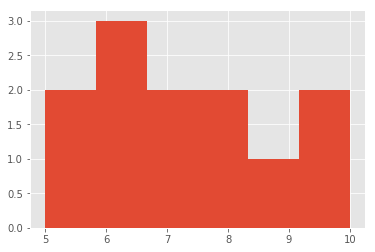

In [20]:
sandwiches['price'].hist(bins=6);

In [21]:
vals=[5,6,7,8,9,10]
probs = [2/12, 3/12, 2/12, 2/12, 1/12, 2/12]

In [22]:
sum(x*px for x,px in zip(vals, probs))

7.25

In [28]:
sandwiches['price']

0     10
1      5
2      6
3      6
4      8
5      9
6      7
7      6
8      8
9      5
10     7
11    10
Name: price, dtype: int64

In [45]:
sample_sizes = np.logspace(0, 5, 50)
sample_means = [np.random.choice(sandwiches['price'], size=int(i)).mean() for i in sample_sizes]

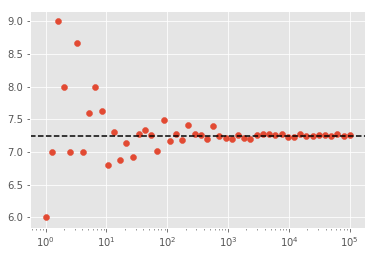

In [46]:
plt.scatter(sample_sizes, sample_means)
plt.xscale('log')
plt.axhline(7.25, linestyle='--', color='k');

In [47]:
yvals=[25,36,49,64,81,100]
probs = [2/12, 3/12, 2/12, 2/12, 1/12, 2/12]

In [48]:
sum(x*px for x,px in zip(yvals, probs))

55.416666666666664

In [49]:
vals

[5, 6, 7, 8, 9, 10]

In [52]:
# Variance
sum(((x - 7.25)**2)*px for x,px in zip(vals, probs))

2.8541666666666665

In [53]:
# standard deviation
np.sqrt(sum(((x - 7.25)**2)*px for x,px in zip(vals, probs)))

1.689427911059441

# Horses & Dogs

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [13]:
np.random.seed(216)

horse_wt = scs.distributions.norm(100,25).rvs(size=12)
dog_wt = scs.distributions.norm(60,10).rvs(size=12)
horse_color = np.random.choice(['white', 'black', 'brown'], p=[0.1, 0.3, 0.6], size=12)
dog_color = np.random.choice(['white', 'black', 'brown'], p=[0.4, 0.3, 0.3], size=12)
horse_ht = 0.05*horse_wt + scs.distributions.norm(0,1).rvs(size=12)
dog_ht = 0.02*dog_wt + scs.distributions.norm(0,1).rvs(size=12)

In [14]:
df_horse = pd.DataFrame(data={'weight':horse_wt, 'color':horse_color, 'height':horse_ht})
df_dog = pd.DataFrame(data={'weight':dog_wt, 'color':dog_color, 'height':dog_ht})

df_horse['animal'] = 'horse'
df_dog['animal'] = 'dog'

df = pd.concat([df_horse, df_dog]).sample(frac=1).reset_index(drop=True)

In [54]:
df.head(10)

,color,height,weight,animal
0,black,1.975001,65.428189,dog
1,brown,2.234386,46.541458,horse
2,brown,2.480195,65.980122,dog
3,white,5.621873,84.139520,horse
4,black,2.043669,58.688497,dog
5,black,4.618539,86.726109,horse
6,white,-0.537184,65.110658,dog
7,brown,1.412375,46.620397,dog
8,white,0.726663,52.927190,dog
9,black,6.971577,116.575449,horse


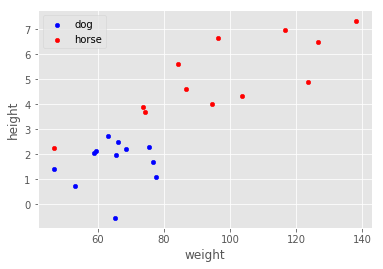

In [16]:
ax = df[df['animal']=='dog'].plot.scatter('weight','height', color='blue', label='dog')
df[df['animal']=='horse'].plot.scatter('weight','height', color='red', label='horse', ax=ax)
plt.legend();

In [17]:
df[(df['color']=='white')]

,color,height,weight,animal
3,white,5.621873,84.139520,horse
6,white,-0.537184,65.110658,dog
8,white,0.726663,52.927190,dog
11,white,2.288010,75.289859,dog
20,white,2.215331,68.325454,dog
23,white,1.683211,76.579886,dog


In [18]:
df[(df['animal']=='horse')]

,color,height,weight,animal
1,brown,2.234386,46.541458,horse
3,white,5.621873,84.139520,horse
5,black,4.618539,86.726109,horse
9,black,6.971577,116.575449,horse
10,brown,4.316814,103.697708,horse
12,black,4.915971,123.434038,horse
13,brown,3.890863,73.587133,horse
14,brown,7.333062,138.228909,horse
15,black,4.030712,94.478316,horse
17,brown,3.697125,74.212135,horse


In [60]:
horses = df[df['animal']=='horse']

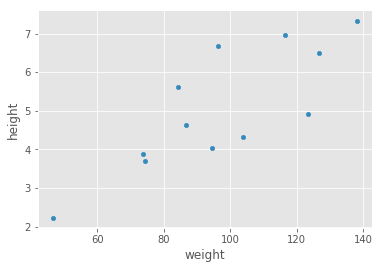

In [61]:
horses.plot.scatter('weight', 'height');

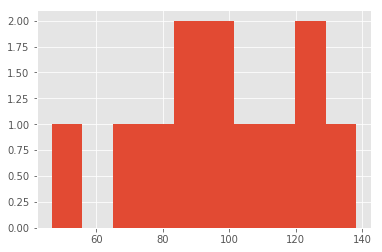

In [63]:
horses['weight'].hist();

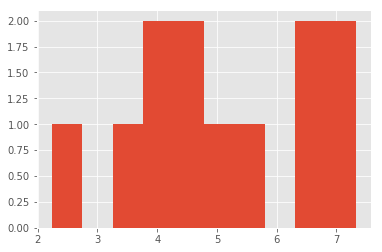

In [64]:
horses['height'].hist();

In [65]:
horses.head(10)

,color,height,weight,animal
1,brown,2.234386,46.541458,horse
3,white,5.621873,84.139520,horse
5,black,4.618539,86.726109,horse
9,black,6.971577,116.575449,horse
10,brown,4.316814,103.697708,horse
12,black,4.915971,123.434038,horse
13,brown,3.890863,73.587133,horse
14,brown,7.333062,138.228909,horse
15,black,4.030712,94.478316,horse
17,brown,3.697125,74.212135,horse


In [67]:
horses.corr()

,height,weight
height,1.000000,0.807156
weight,0.807156,1.000000
